<a href="https://colab.research.google.com/github/18wh1a1234/WiseML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [35]:
data = pd.read_csv('/content/pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###Explatory Anaylsis

In [38]:
def plot_scatter(df, cols):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 4, loc + 1)
        plt.scatter(df[col], df['1'])
        plt.xlabel(f'{col}')
        plt.ylabel('1')
    return None

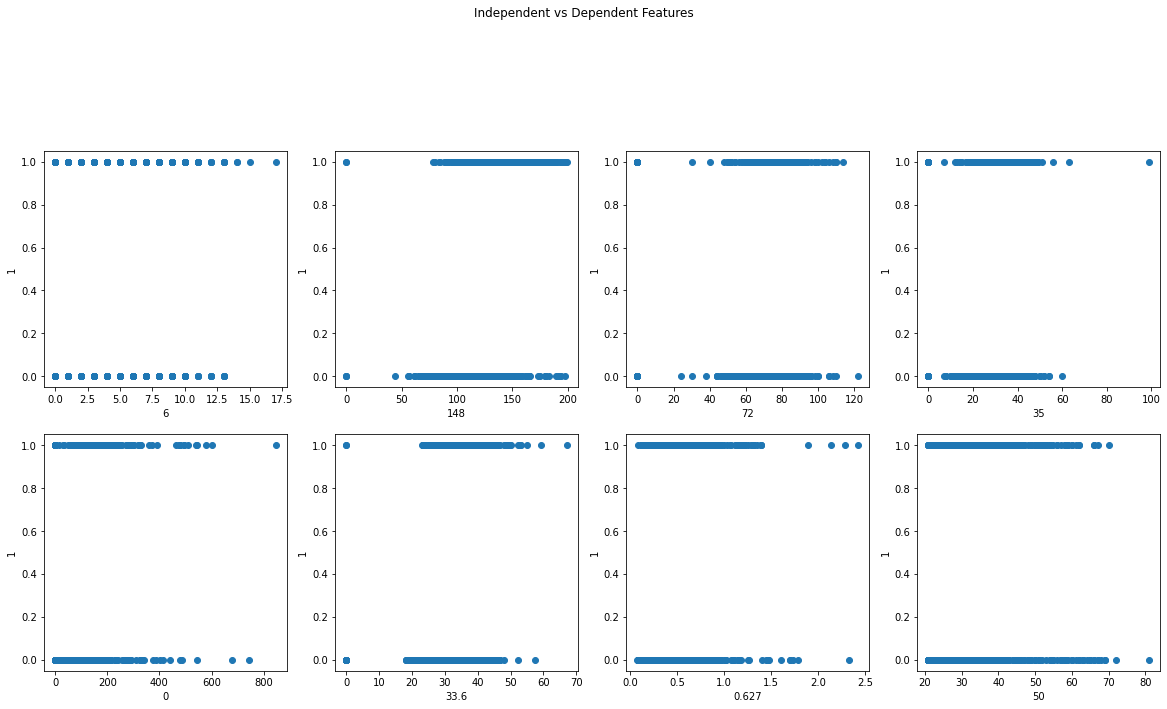

In [39]:
plot_scatter(data, data.columns[:-1])
plt.show()
plt.close()

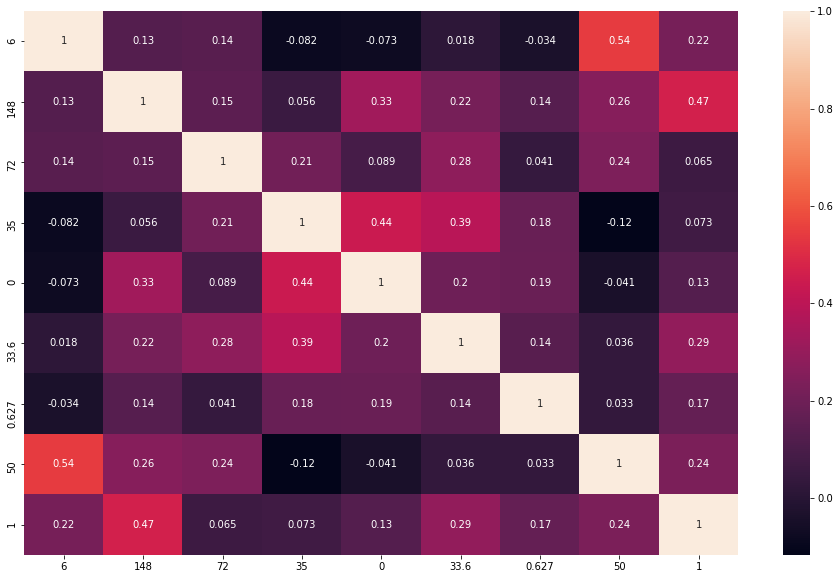

In [9]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Splitting Data

In [10]:
features = data.drop(['1'], axis = 1)
target = data['1']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print(X_train.shape)

(536, 8)


### Model Training

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.intercept_, lr_model.coef_)

-0.862481182281654 [ 2.16590524e-02  5.79533160e-03 -9.17115082e-04  9.43836573e-04
 -4.38065753e-05  1.03858914e-02  1.59384954e-01  2.08449501e-03]


In [12]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

print(f"Training error: {sqrt(mean_squared_error(y_train, train_pred)):.3f}")
print(f"Testing error: {sqrt(mean_squared_error(y_test, test_pred)):.3f}")

Training error: 0.402
Testing error: 0.394


In [13]:
y_test

667    0
324    0
623    0
689    0
521    0
      ..
618    1
198    1
537    0
329    0
302    1
Name: 1, Length: 231, dtype: int64

In [14]:
test_pred

array([ 3.16335436e-01,  3.50984759e-01,  1.36880044e-01,  3.20321792e-01,
        1.24615610e-02,  2.18864872e-01,  1.88854206e-01,  3.13003100e-01,
        5.28532272e-01, -2.79462011e-03,  7.81131292e-01,  4.69259428e-01,
        2.39162947e-01,  5.15100975e-01,  6.93822093e-01,  7.91804260e-01,
        1.40751118e-01,  1.26863854e-01,  3.10987415e-01,  4.00540007e-01,
        2.80067039e-01,  7.26484247e-02,  2.24186320e-01,  8.20327239e-01,
        4.41960745e-01,  2.01948635e-03,  1.76943231e-01, -3.52054482e-02,
        2.55465553e-01,  4.67021278e-01,  3.35534656e-01,  5.05328513e-01,
        7.34611226e-01,  4.34971713e-01, -3.12795758e-02,  7.96281326e-01,
        9.33034485e-01,  4.18874060e-01,  4.88918332e-01,  1.48755218e-01,
        1.50768668e-01,  6.88491457e-01,  5.93899753e-01,  4.33133326e-01,
        4.80921730e-01,  1.32939086e-02,  6.58000253e-01,  4.42608575e-01,
        6.37062315e-01,  8.75742060e-01,  5.39630087e-02,  3.07265542e-01,
       -1.49806471e-01,  

In [15]:
lr_model.score(X_test, y_test)

0.3139947323032979

In [16]:
lr_model.score(X_train, y_train)

0.288670435243628

### Logistic Regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv('/content/Wine.csv')
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
data.columns = ['class','alcohol','malicAcid','ash','alkalinity of ash','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols',
                'proanthocyanins','colorIntensity','hue','od280/od315_of_diluted_wines','proline']
data

,class,alcohol,malicAcid,ash,alkalinity of ash,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         177 non-null    int64  
 1   alcohol                       177 non-null    float64
 2   malicAcid                     177 non-null    float64
 3   ash                           177 non-null    float64
 4   alkalinity of ash             177 non-null    float64
 5   magnesium                     177 non-null    int64  
 6   totalPhenols                  177 non-null    float64
 7   flavanoids                    177 non-null    float64
 8   nonFlavanoidPhenols           177 non-null    float64
 9   proanthocyanins               177 non-null    float64
 10  colorIntensity                177 non-null    float64
 11  hue                           177 non-null    float64
 12  od280/od315_of_diluted_wines  177 non-null    float64
 13  proli

In [21]:
data.tail()

,class,alcohol,malicAcid,ash,alkalinity of ash,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280/od315_of_diluted_wines,proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [23]:
features = data.drop(['class'],axis=1)
target = data['class']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

### Logistic

In [24]:
logreg_model = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [25]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 95.161%


### KNN

In [26]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

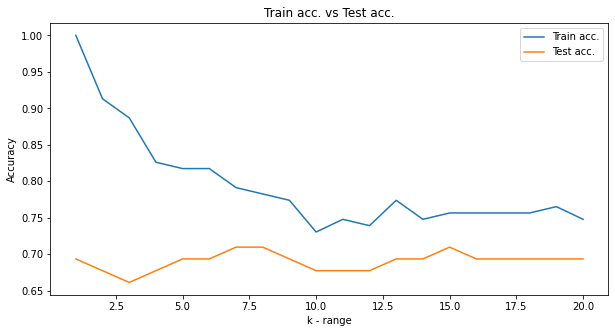

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 73.043%
Testing Accuracy: 67.742%
